# Data Exploration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
import sys
sys.path.append("../")

from MapSci.papers import papers
from MapSci.research_space import research_space
from MapSci.entities import entities
import MapSci.agg as agg

In [3]:
pp = papers("lattes")
pp.set_entries("../dataset/lattes_categories.csv", sep=";sep;")
publi, pesq, dist_sci = pp.yearly_lazy()

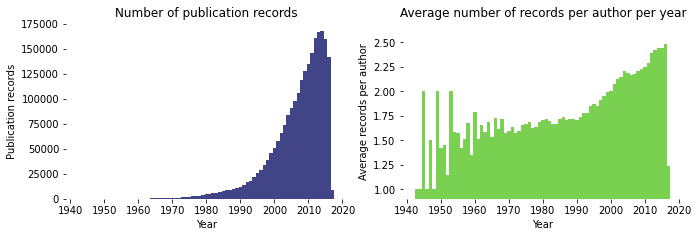

In [9]:
plt.rcParams["figure.figsize"] = (9.8,3.4)
fig = plt.figure()

ax = fig.add_subplot(1,2,1)
ax.bar(publi[0][1:], publi[1][1:], color=plt.cm.viridis(0.2), zorder=2,width=1)
plt.title('Number of publication records')
plt.ylabel('Publication records')
plt.xlabel('Year')
plt.box(False)
plt.tight_layout()
ax.yaxis.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.2)
ax.yaxis.grid(zorder=0)

div = [publi[1][i+1]/pesq[1][i+1] for i in range(len(pesq[1])-1)]
ax = fig.add_subplot(1,2,2)
ax.bar(pesq[0][1:], div, color=plt.cm.viridis(0.8), zorder=2, width=1)
plt.title('Average number of records per author per year')
plt.ylabel('Average records per author')
plt.xlabel('Year')
plt.box(False)
plt.tight_layout()
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0.9,2.7))
ax.yaxis.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.2)
ax.yaxis.grid(zorder=0)

# plt.show()
plt.savefig("new plots/npapers.pdf",bbox_inches='tight')

In [4]:
inst, st = agg.get_insts(dist_sci.keys(), "../dataset/lattes/pesquisadores.csv", sep=";sep;")

dist_inst = defaultdict(int)
for s in dist_sci:
    if s in inst and inst[s] != 'none':
        dist_inst[inst[s]] += dist_sci[s]

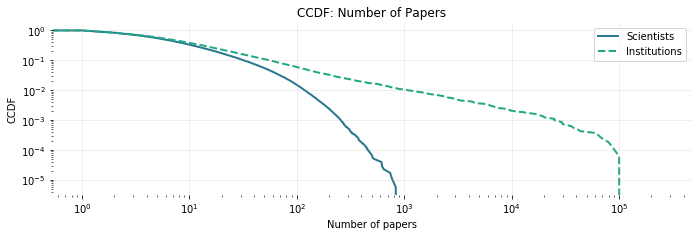

In [15]:
plt.rcParams["figure.figsize"] = (9.8,3.4)
scales = [dist_sci, dist_inst]
col = plt.cm.viridis([0.4,0.6])   
for i in range(len(scales)):
    dis = scales[i]
    d = [0]+sorted([dis[k] for k in dis])
    X, F = np.unique(d, return_index=True)
    ccdf = 1-F/F.max()
    if i%2==0:
        plt.plot(X,ccdf,lw=2,zorder=1,color=col[i])
    else:
        plt.plot(X,ccdf,lw=2,zorder=1,color=col[i], linestyle='--')

plt.title("CCDF: Number of Papers")
plt.xscale('log')
plt.yscale('log')
plt.ylabel('CCDF')
plt.xlabel('Number of papers')
plt.legend(['Scientists', 'Institutions'])
plt.box(False)
plt.tight_layout()

ax = plt.gca()
ax.yaxis.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.2)
ax.yaxis.grid(zorder=0)
ax.xaxis.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.2)
ax.xaxis.grid(zorder=0)

plt.savefig("CCDF.pdf",bbox_inches='tight')